<h1 style="text-align:center">Ch4.2 Linear Regression of Indicator Matrix<h1>

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}


<IPython.core.display.Javascript object>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

## 1. Fit a linear model

$$\hat{\mathbf{Y}} = \mathbf{X}(\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^{T}\mathbf{Y}$$
$$\hat{G}(x) = \mathrm{argmax}_{k\in \mathcal{g}} \hat{f}_k(x)$$

In [3]:
def find_Beta_hat_IM(X,Y):
    return np.linalg.pinv(X) * Y

def find_Y_hat(X, Beta):
    return X * Beta

def find_G_hat(y_hat):
    return np.argmax(y_hat, axis=1)

## 2. Implementation for Example

### 2-1. For the binary classification
with $N=100$ observations and $K=2$ classes, The $(N \times K)$ indicator response matrix $\mathbf{Y}$ is:
$$\mathbf{Y} = 
\begin{pmatrix}
1 & & 0 \\ 1 & & 0 \\ &\vdots& \\ 0 & & 1 \\ 0 & & 1
\end{pmatrix}
$$
It contains 50 $(1, 0)$ row vectors upside and 50 $(0, 1)$ row vectors from middle to bottom

In [4]:
# Input variables
feature = 2
np.random.seed(15)

x1 = np.random.normal(loc=0.8,scale=0.1,size=(50,feature)) # loc=mean, scale=variation
x2 = np.random.normal(2,0.15, size=(50,feature))

X = np.vstack((x1,x2))
X_add_1 = sm.add_constant(X)
X_add_1.shape

(100, 3)

In [5]:
Y1 = np.matrix([1,0]) #: cat
Y2 = np.matrix([0,1]) #: dog
Yup = np.tile(Y1, (50,1))
Ydown = np.tile(Y2, (50,1))

Y = np.vstack((Yup, Ydown))
Y.shape

(100, 2)

#### From the linear regression, find the intercept and coefficients

In [6]:
Beta_hat_IM = find_Beta_hat_IM(X_add_1,Y)
Beta_hat_IM

matrix([[ 1.64984111, -0.64984111],
        [-0.53863399,  0.53863399],
        [-0.28815949,  0.28815949]])

### 2-2. Classify data 

In [7]:
new_x = np.random.normal(1.7,2,2)
new_x_add_1 = np.insert(new_x, 0, 1)
new_x_add_1 = np.matrix(new_x_add_1)
new_x_add_1

matrix([[1.        , 1.99038368, 0.45389678]])

In [8]:
Y_hat_IM = find_Y_hat(new_x_add_1, Beta_hat_IM)
Y_hat_IM

matrix([[0.44695814, 0.55304186]])

In [9]:
G_hat_IM = find_G_hat(Y_hat_IM)
if G_hat_IM == np.matrix([1]):
    print("Dog!")
else:
    print("Cat!")

Dog!


### $\Rightarrow$ New data is classified as a Cat!

## 3. Plotting

In [10]:
x11_IM = x1[:,0]
x12_IM = x1[:,1]
x21_IM = x2[:,0]
x22_IM = x2[:,1]

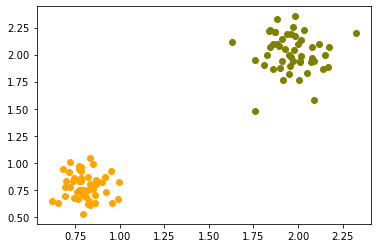

In [11]:
plt.scatter(x11_IM, x12_IM, color="orange")
plt.scatter(x21_IM, x22_IM, color="olive")

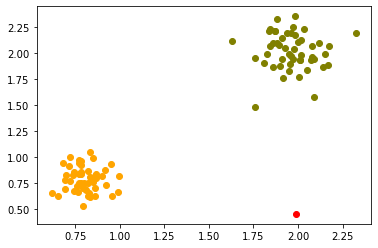

In [12]:
plt.scatter(x11_IM, x12_IM, color="orange")
plt.scatter(x21_IM, x22_IM, color="olive")
plt.scatter(new_x[0],new_x[1], color="red")

### 3-1. Decision Boundary

In [13]:
itc_1 = Beta_hat_IM[0,0]
itc_2 = Beta_hat_IM[0,1]
itc = itc_1-itc_2
itc

2.2996822194843296

In [14]:
Beta_hat_IM # (p+1)xK matrix

matrix([[ 1.64984111, -0.64984111],
        [-0.53863399,  0.53863399],
        [-0.28815949,  0.28815949]])

In [15]:
coeff_1 = Beta_hat_IM[1:3,0]
coeff_2 = Beta_hat_IM[1:3,1]
B_1 = np.array( (coeff_1 - coeff_2)[0] )
B_2 = np.array( (coeff_1 - coeff_2)[1] )
B_1

array([[-1.07726798]])

In [16]:
def find_boundary(x):
    return - (itc * np.ones(len(x)) + x * B_1 ) / B_2

In [17]:
X[:,0].shape

(100,)

In [18]:
X1 = X[:,0]
X2 = np.asarray(find_boundary(X1)).ravel()
X2.shape

(100,)

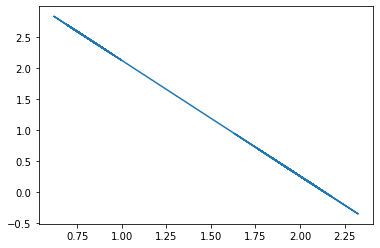

In [19]:
plt.plot(X1,X2)
plt.show()

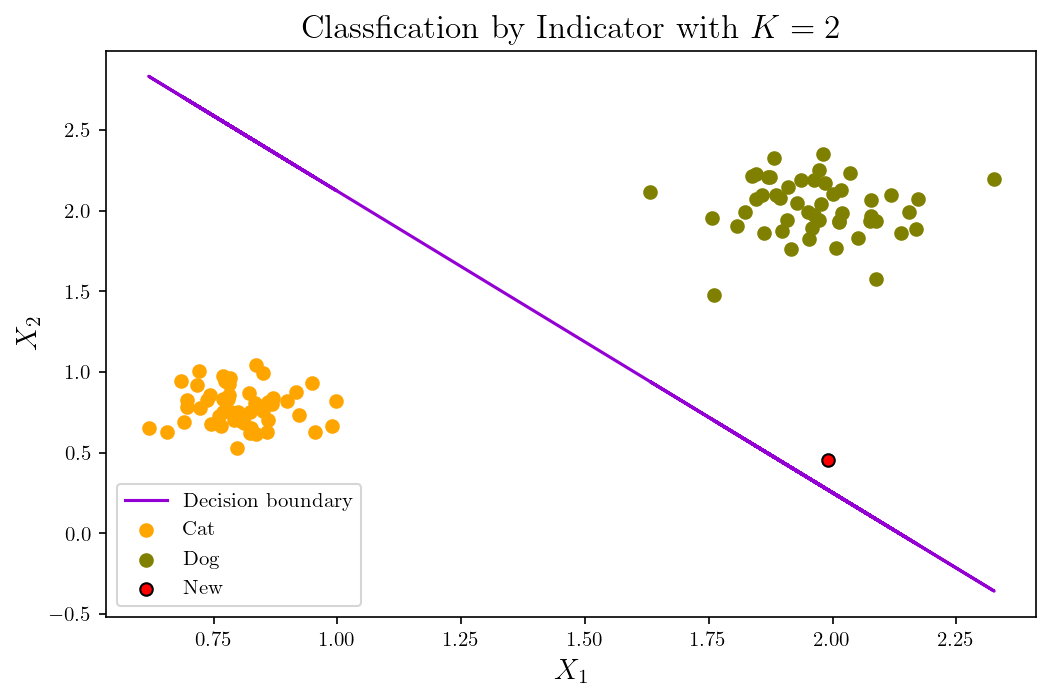

In [20]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

plt.figure(figsize=(8,5), dpi=150)
plt.title(r"Classfication by Indicator with $K=2$", fontsize=16)
plt.xlabel(r'$X_1$', fontsize=14)
plt.ylabel(r'$X_2$', fontsize=14)

plt.plot(X1,X2, color="darkviolet", label="Decision boundary")
plt.scatter(x11_IM, x12_IM, color="orange", label="Cat")
plt.scatter(x21_IM, x22_IM, color="olive", label="Dog")
plt.scatter(new_x[0],new_x[1], color="red", edgecolors="black", label="New")

plt.legend()
plt.show()